In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression

### Question 0
Load the telco data file we used in Lab 3, and perform a train-test split. Now build a Random Forest model, and print the score on train and test.

Below, we first read the telco file into a dataframe. Then we create the target, y, from the Churn column, and the features, X, are all the columns except for Churn.

In [43]:
df=pd.read_csv("telco.csv")
cleandf= df.drop(['Churn'], axis=1)
x=cleandf
y=df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)


<h2>Question 1</h2>
Build random forest models with the number of estimators ranging from 20 to 500. Write a loop where n_estimators increases 20 at each iteration, and save the train and test scores. <i>Hint: before the loop, create an empty list, **results**. With each iteration, you can use the append method to add the current scores, consisting of a tuple with the test score, train score, and the current value of **n**.</i>

In [44]:
results = []


for n in range(20, 501, 20):
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(x_train,y_train)
    
   
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    
    results.append((test_score, train_score, n))

print(results)

[(0.7938388625592417, 0.9900446972775294, 20), (0.7928909952606635, 0.9967492889069484, 40), (0.7976303317535545, 0.9971556277935798, 60), (0.7962085308056872, 0.9971556277935798, 80), (0.7976303317535545, 0.9971556277935798, 100), (0.7990521327014218, 0.9973587972368956, 120), (0.7985781990521327, 0.9973587972368956, 140), (0.8, 0.9973587972368956, 160), (0.7995260663507109, 0.9973587972368956, 180), (0.7985781990521327, 0.9973587972368956, 200), (0.7990521327014218, 0.9973587972368956, 220), (0.8009478672985783, 0.9973587972368956, 240), (0.7990521327014218, 0.9973587972368956, 260), (0.8, 0.9973587972368956, 280), (0.8, 0.9973587972368956, 300), (0.7990521327014218, 0.9973587972368956, 320), (0.8014218009478673, 0.9973587972368956, 340), (0.7990521327014218, 0.9973587972368956, 360), (0.7985781990521327, 0.9973587972368956, 380), (0.7976303317535545, 0.9973587972368956, 400), (0.7966824644549763, 0.9973587972368956, 420), (0.7966824644549763, 0.9973587972368956, 440), (0.79431279620

<h2> Question 1a</h2>

What is the effect of number of estimators on test accuracy? What about the effect on train accuracy?


Estimators seem to have an effect on training score as well as on the training scores with marginal gains occuring as the number of estimators increase. this is applicable until we reach 80 estimators after that threshold the train score seems to be unaffected by any increase in estimators. the test score after 80 seems to bounce between two values that periodically change.

<h2> Question 2</h2>

Create a line plot of train and test scores for each value of the number of estimators, by completing the following code.

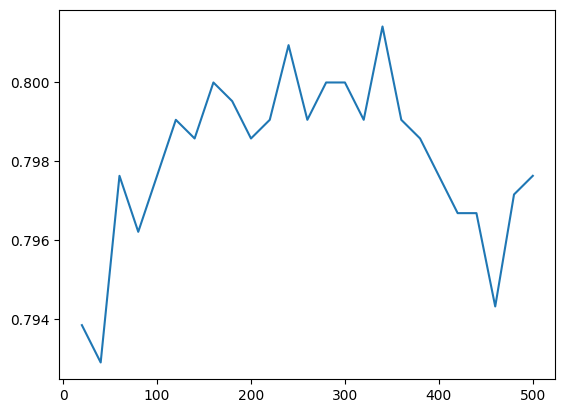

In [45]:
# first just plot test scores
# x axis - a list of the values for number of estimators
xlabel = [item[2] for item in results]
test_scores = [item[0] for item in results]
# two arguments to plot are the x axis values and the y axis values
# y axis - list of test scores
plt.plot(Xlabel,test_scores )
# finally need to show the plots
plt.show()

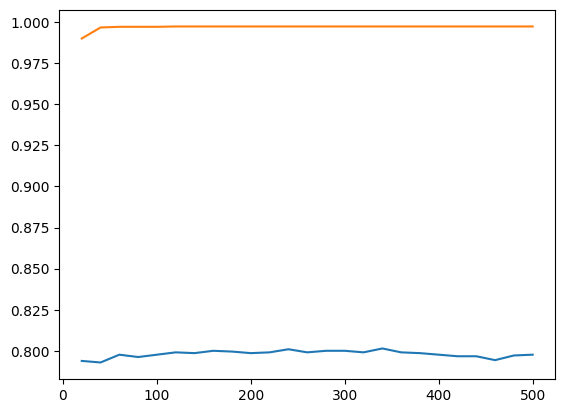

In [46]:
# now plot train and test scores
# x axis - a list of the values for number of estimators
xlabel = [item[2] for item in results]
# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values
train_scores = [item[1] for item in results]

plt.plot(xlabel ,test_scores )
# do another plot, with same x axis, and on the y axis - list of test scores
plt.plot(xlabel,train_scores)
# finally need to show the plots
plt.show()

<h2>Question 3</h2>
 Build an MLP model, and print the score on train and test.

In [47]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)

train_score = mlp.score(x_train, y_train)
test_score = mlp.score(x_test, y_test)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy: {test_score:.4f}")

Train Accuracy: 0.7989
Test Accuracy: 0.8090


<h2>Question 4</h2>
Now try mlp models with different values for the hidden layer size. Try with a single hidden layer, with sizes ranging from 1 to 100, incremented by 5. (Use the MLP parameter, hidden_layer_sizes, which takes a value as a tuple -- for a single hidden layer, just one value in parenthesis.) Save the train and test scores in two lists.

In [53]:
results = []

# Loop through different values of n_estimators
for n in range(1, 101, 5):
    model = MLPClassifier(hidden_layer_sizes=(n,), max_iter=500, random_state=42)
    model.fit(x_train, y_train)
    
    # Compute accuracy scores
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    
    # Store results as a tuple (test score, train score, n)
    results.append((test_score, train_score, n))


<h2>Question 5</h2>
Make a line plot of train and test scores for the mlp models with the different hidden layer sizes.

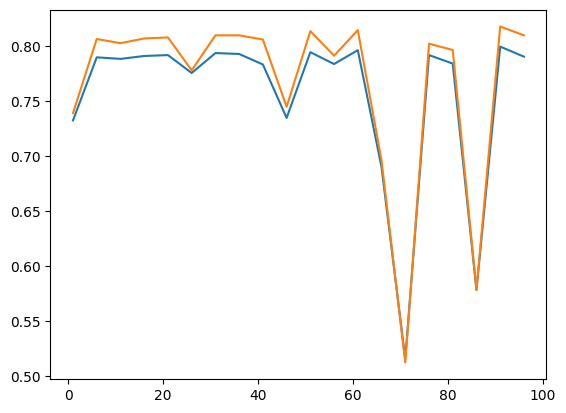

In [56]:
# x axis - a list of the values for number of estimators
x = [item[2] for item in results]
test_score = [item[0] for item in results]
train_score = [item[1] for item in results]
# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values
plt.plot(x, train_score)
# do another plot, with same x axis, and on the y axis - list of test scores
plt.plot(x, test_score)
# finally need to show the plots
plt.show()

<h2>Question 6</h2>
Read the HomesSoldHellerup.csv file, using read_csv (note that the separator is a semicolon and not a comma, which is the default). Display the different values for the Type feature, using value_counts. Do the same with Type of Sale.

In [66]:
df=pd.read_csv("HomesSoldHellerup.csv",sep=";")

print(df.head())
print(df["Type"].value_counts())
print(df["Type of Sale"].value_counts())


     Road name Road Number       Type  m2  Build Year  ZipCode      City  \
0  Tuborgvej            54  Lejlighed  54        1932     2900  Hellerup   
1  Tuborgvej            54  Lejlighed  87        1932     2900  Hellerup   
2  Tuborgvej            54  Lejlighed  63        1932     2900  Hellerup   
3  Tuborgvej            54  Lejlighed  54        1932     2900  Hellerup   
4  Tuborgvej            54  Lejlighed  63        1932     2900  Hellerup   

  Date of Sale Type of Sale    Price  
0     20-07-15    Alm. Salg  1700000  
1     12-05-15    Alm. Salg  2815000  
2     29-12-10    Alm. Salg  1575000  
3     10-04-12    Alm. Salg  1340000  
4     04-02-12    Alm. Salg  1435000  
Type
Lejlighed          1237
Villa               742
Rækkehus            174
Stuehus               3
Erhverv               2
Døgninstitution       2
Name: count, dtype: int64
Type of Sale
Alm. Salg    1978
Fam. Salg     109
Andet          52
Auktion        21
Name: count, dtype: int64


<h2>Question 7</h2>
We assign to X a list of the features, m2 and Build Year, and the target value y is Price, as shown below. Perform a train-test split, and then create a Linear Regression model. Print the score for train and test.

In [102]:

Df=pd.read_csv("HomesSoldHellerup.csv",sep=";")
X= Df[["m2","Build Year"]]
Y=Df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

Model=LinearRegression()
Model.fit(X_train,Y_train)
Ltrain_score = Model.score(X_train, Y_train)
Ltest_score = Model.score(X_test, Y_test)

print(Ltrain_score)
print(Ltest_score)



0.31818806196810223
0.3495114609243547


<h2>Question 8</h2>
Add the ZipCode feature to X. Then redo the train-test split, and create a Linear Regression model. Print the score for train and test.

In [108]:

Df=pd.read_csv("HomesSoldHellerup.csv",sep=";")
X= Df[["m2","Build Year","ZipCode"]]
Y=Df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

Model=LinearRegression()
Model.fit(X_train,Y_train)
Ltrain_score = Model.score(X_train, Y_train)
Ltest_score = Model.score(X_test, Y_test)

print(Ltrain_score)
print(Ltest_score)


0.32853258688940945
0.3314091448521831


<h2>Question 8a</h2>

Does adding ZipCode substantially improve the score for the linear regressor? Why do you think this is?

for me it did not substantially improve the score but it might and here is why: Some neighborhoods are more expensive than others despite M2 or build year this could come from other socio-economic factors which contribute to the price of a building. This means that Zipcode might help capture some patterns that would be difficult to establish without it.

<h2> Question 9</h2>
Build a Random Forest regressor for this data. Set random_state, with otherwise default settings, and print train and test scores.

In [109]:
Df=pd.read_csv("HomesSoldHellerup.csv",sep=";")
X= Df[["m2","Build Year","ZipCode"]]
Y=Df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)


rftrain_score = rf.score(X_train, Y_train)
rftest_score = rf.score(X_test, Y_test)

print(rftrain_score)
print(rftest_score)

0.9297640450271232
0.6594514872896953


<h2>Question 9a</h2>

How do the results for RF regressor compare with those of the linear regressor? Try to come up with an explanation for the difference.

The Train score is almost three times as good with the test score being double as good. putting aside overfitting which i think is happening to a certain degree there are a couple things that explain this behaviour such as the fact that linear regression cannot capture non linear relationships this along with the fact that linear regression is sensitive to outliers due to the math behind doing linear regression all contribute to the low score of the regression model. The Random forest however is not sensetive to outliers due to the many inputs that it weighs along with its ability to capture non linear trends and relationships significantly contribute to its test scores